# Import

In [1]:
# importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Importing the dataset
%time train = pd.read_csv('C:/Users/SONU KUMAR JHA/Documents/R/Datasets/bank/bank.csv',sep=';')

Wall time: 280 ms


In [3]:
df = train.copy()

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [6]:
df.describe(exclude=np.number)

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,yes,no,cellular,may,unknown,no
freq,969,2797,2306,4445,2559,3830,2896,1398,3705,4000


In [7]:
df.y.value_counts()

no     4000
yes     521
Name: y, dtype: int64

In [8]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [9]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [10]:
colname = []
for x in df.columns:
    if df[x].dtype == 'object':
        colname.append(x)
colname

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [11]:
from sklearn import preprocessing
le = {}
for x in colname:
    le[x] = preprocessing.LabelEncoder()
for x in colname:
    df[x] = le[x].fit_transform(df[x])

In [12]:
X = df.copy()
y = X.pop('y')

In [14]:
# Fitting the model
from sklearn.ensemble import RandomForestClassifier
m = RandomForestClassifier(n_jobs=-1,oob_score=True,n_estimators=100)
m.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=.3)

In [16]:
from sklearn.ensemble import RandomForestClassifier
m = RandomForestClassifier(n_jobs=-1,oob_score=True,n_estimators=100)
m.fit(X_train,y_train)
m.score(X_train,y_train),m.score(X_valid,y_valid)

(1.0, 0.8997789240972734)

In [17]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
y_pred = m.predict(X_valid)
cm = confusion_matrix(y_valid,y_pred)
print(cm)
print(classification_report(y_valid,y_pred))
print(accuracy_score(y_valid,y_pred))

[[1186   27]
 [ 109   35]]
             precision    recall  f1-score   support

          0       0.92      0.98      0.95      1213
          1       0.56      0.24      0.34       144

avg / total       0.88      0.90      0.88      1357

0.8997789240972734


# Tuning the model

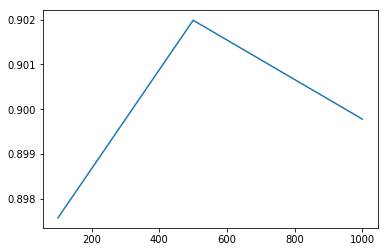

In [76]:
results = []
ntree = [100,500,1000]
for tree in ntree:
    m = RandomForestClassifier(n_jobs=-1,n_estimators=tree,oob_score=True,random_state=42)
    m.fit(X_train,y_train)
    res = m.score(X_valid,y_valid)
    results.append(res)

pd.Series(results,ntree).plot()

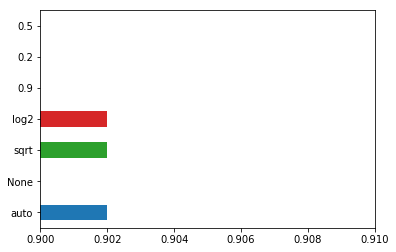

In [78]:
results = []
max_feature_options = ['auto',None,'sqrt','log2',.9,.2,.5]
for max_features in max_feature_options:
    m = RandomForestClassifier(n_jobs=-1,n_estimators=500,oob_score=True,random_state=42,max_features=max_features)
    m.fit(X_train,y_train)
    res = m.score(X_valid,y_valid)
    results.append(res)

pd.Series(results,max_feature_options).plot(kind='barh',xlim=(.9,.91))

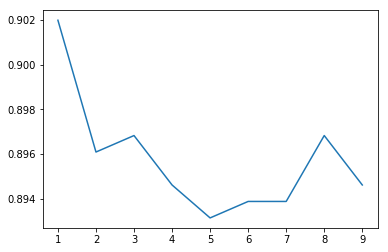

In [79]:
%timeit
results = []
min_samples = [1,2,3,4,5,6,7,8,9]
for min_sample in min_samples:
    m = RandomForestClassifier(n_jobs=-1,n_estimators=500,oob_score=True,random_state=42,min_samples_leaf=min_sample)
    m.fit(X_train,y_train)
    res = m.score(X_valid,y_valid)
    results.append(res)

pd.Series(results,min_samples).plot()

In [80]:
m = RandomForestClassifier(n_jobs=-1,oob_score=True,n_estimators=500)
m.fit(X_train,y_train)
m.score(X_train,y_train),m.score(X_valid,y_valid)

(1.0, 0.9012527634487841)

In [81]:
y_pred = m.predict(X_valid)
cm = confusion_matrix(y_valid,y_pred)
print(cm)
print(classification_report(y_valid,y_pred))
print(accuracy_score(y_valid,y_pred))

[[1168   31]
 [ 103   55]]
             precision    recall  f1-score   support

          0       0.92      0.97      0.95      1199
          1       0.64      0.35      0.45       158

avg / total       0.89      0.90      0.89      1357

0.9012527634487841


# Feature Importance

In [82]:
def rf_feat_importance(m,df):
    return pd.DataFrame({'cols':df.columns,
                       'imp':m.feature_importances_}).sort_values(by='imp',ascending=False)

In [83]:
fi = rf_feat_importance(m, X_train);fi[:10]

,cols,imp
11,duration,0.285423
5,balance,0.107003
0,age,0.103332
9,day,0.089701
10,month,0.079696
15,poutcome,0.053150
13,pdays,0.051367
1,job,0.048364
12,campaign,0.041030
3,education,0.028907


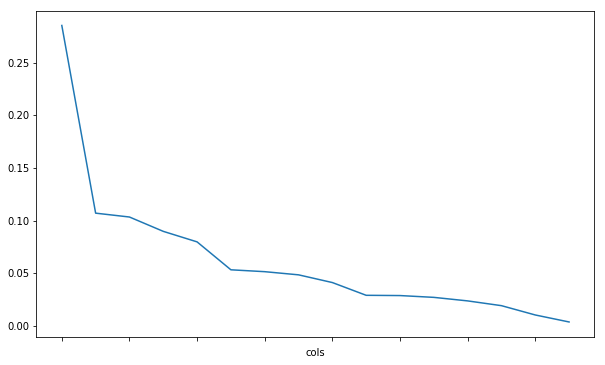

In [84]:
fi.plot('cols', 'imp', figsize=(10,6), legend=False)

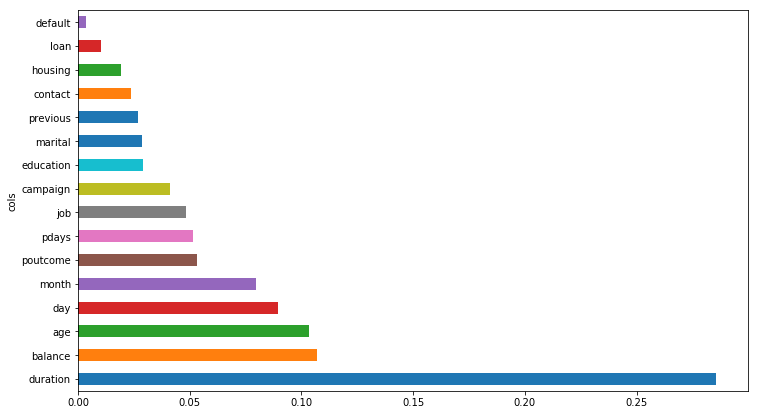

In [85]:
def plot_fi(fi): 
  return fi.plot('cols','imp','barh', figsize=(12,7), legend=False)
plot_fi(fi[:30]);

In [86]:
to_keep = fi[fi.imp>0.005].cols
X_keep = X[to_keep].copy()
len(to_keep)

15

In [87]:
X.shape

(4521, 16)

In [88]:
X_train,X_valid,y_train,y_valid=train_test_split(X_keep,y,test_size=.3)

In [89]:
# Fitting the model
m = RandomForestClassifier(n_jobs=-1,oob_score=True,n_estimators=500)
m.fit(X_train,y_train)
m.score(X_train,y_train),m.score(X_valid,y_valid)

(1.0, 0.9005158437730287)

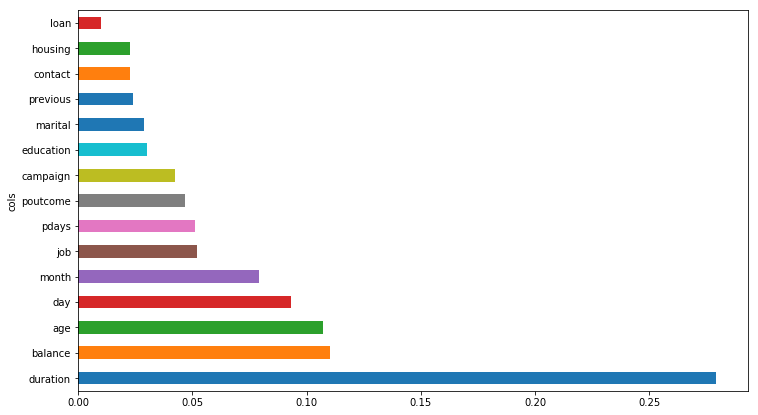

In [90]:
fi = rf_feat_importance(m, X_train)
plot_fi(fi)

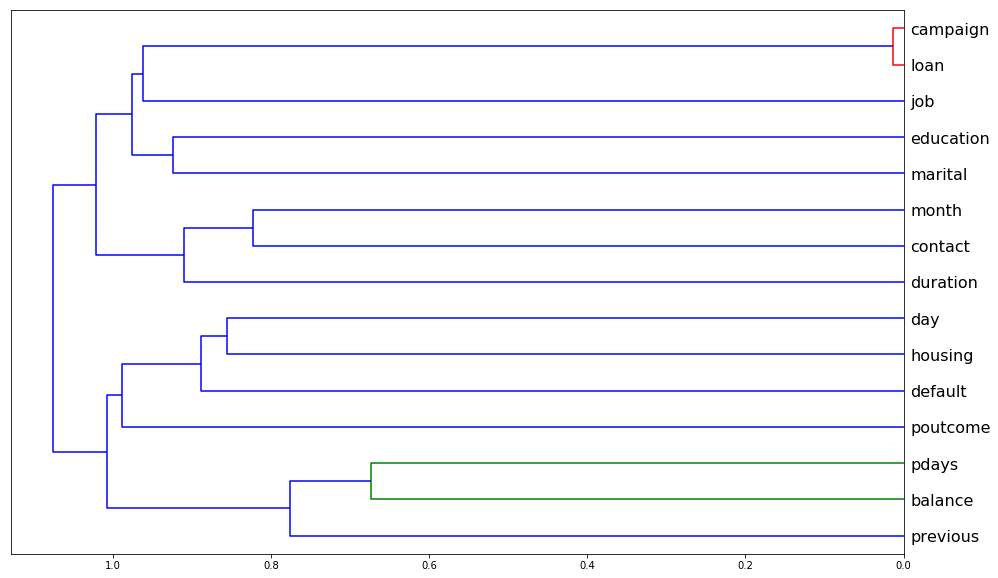

In [91]:
from scipy.cluster import hierarchy as hc
import scipy
corr = np.round(scipy.stats.spearmanr(X_keep).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=X.columns, 
      orientation='left', leaf_font_size=16)
plt.show()

In [92]:
y_pred = m.predict(X_valid)
cm = confusion_matrix(y_valid,y_pred)
print(cm)
print(classification_report(y_valid,y_pred))
print(accuracy_score(y_valid,y_pred))

[[1182   23]
 [ 112   40]]
             precision    recall  f1-score   support

          0       0.91      0.98      0.95      1205
          1       0.63      0.26      0.37       152

avg / total       0.88      0.90      0.88      1357

0.9005158437730287
